# 1-)AMAC

 Ayrık-zamanlı işaretlerin Ayrık-zamanlı Fourier Dönüşü’münün (DTFT) ve Ayrık Fourier
Dönüşümü’nün (DFT) hesaplanması, genlik ve faz grafiklerinin çizdirilmesi ve yorumlanması.

 DFT hesaplanırken dikkat edilmesi gerekenlerin öğrenilmesi.

 Periyodik işaretlerin DFT ile sentezi

# 2-) KODLAR

### 2.1 Ayrık-zamanlı Fourier dönüşümü (DTFT)

<IPython.core.display.Javascript object>


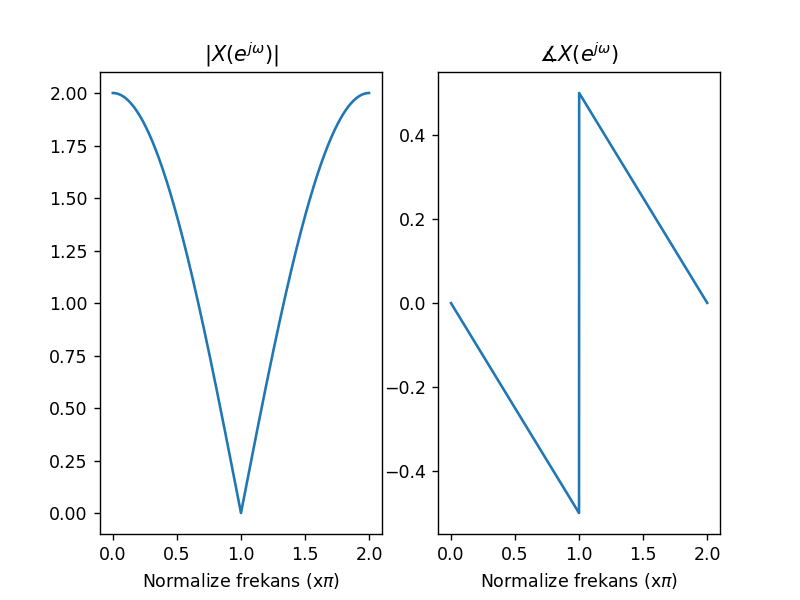

Text(0.5, 0, 'Normalize frekans (x$\\pi$)')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib notebook
w_cont=np.arange(0,2*np.pi,np.pi/1000)
X_abs=np.abs(2*np.cos(w_cont/2))
X_phase=np.array([-w/2 if w<np.pi else -w/2+np.pi for w in w_cont])
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs)
plt.title('$|X(e^{j\omega})|$')
plt.xlabel('Normalize frekans (x$\pi$)')
plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase/np.pi)
plt.title('$\measuredangle X(e^{j\omega})$')
plt.xlabel('Normalize frekans (x$\pi$)')

### 2.2 Ayrık Fourier dönüşümü (DFT)

<IPython.core.display.Javascript object>


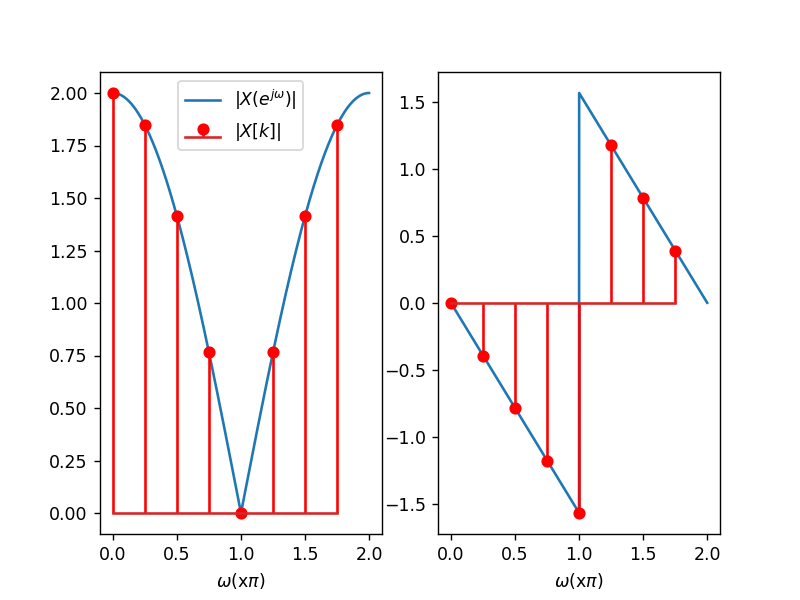

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_13528\574347186.py:22: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(w_discrete/np.pi,X_k_abs,'r-',label='$|X[k]|$',markerfmt='ro')
C:\Users\MONSTER\AppData\Local\Temp\ipykernel_13528\574347186.py:28: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(w_discrete/np.pi,X_k_phase,'r-',label='$\measuredangleX[k]$',markerfmt='ro')


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
def dirac(n):
    if n==0:
        return 1
    else:
        return 0
    
N=8
X_k=np.zeros([N],dtype=complex)
for k in range(N):
    for n in range(N):
        X_k[k]=X_k[k]+(dirac(n)+dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)

X_k_abs=np.abs(X_k)
X_k_phase=np.angle(X_k)
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,X_k_abs,'r-',label='$|X[k]|$',markerfmt='ro')
plt.xlabel('$\omega$(x$\pi$)')
plt.legend()

plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$\measuredangleX(e^{j\omega})$')
plt.stem(w_discrete/np.pi,X_k_phase,'r-',label='$\measuredangleX[k]$',markerfmt='ro')
plt.xlabel('$\omega$(x$\pi$)')
plt.legend()

### 2.3 Ayrık Fourier dönüşümü (DFT)

<IPython.core.display.Javascript object>


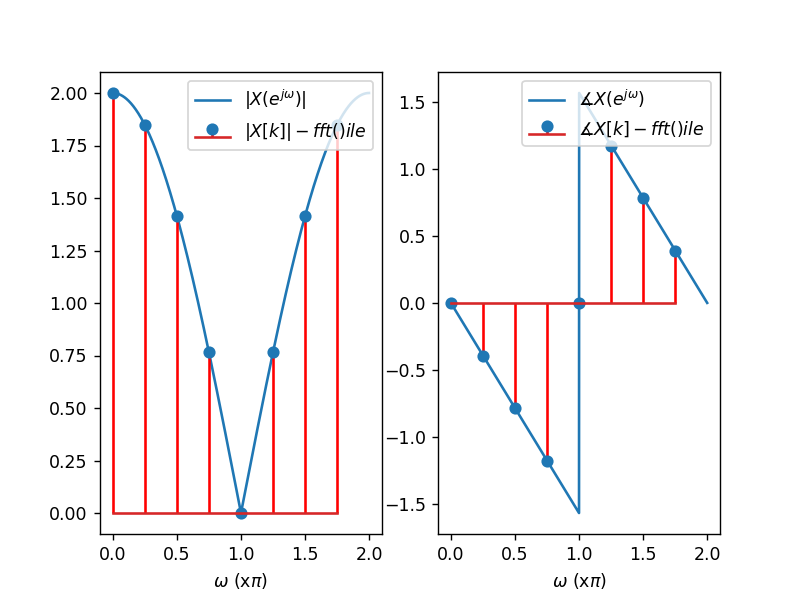

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_13528\3728081732.py:13: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
C:\Users\MONSTER\AppData\Local\Temp\ipykernel_13528\3728081732.py:18: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(w_discrete/np.pi,phase_fft_X,'ro-',label='$ \measuredangle X[k]-fft() ile$')


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
x=np.array([1,1])
fft_X=fft(x,8)
abs_fft_X=np.abs(fft_X)
phase_fft_X=np.angle(fft_X)
## Grafik çizimi
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,phase_fft_X,'ro-',label='$ \measuredangle X[k]-fft() ile$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

#### 2.2.1 Frekansta örnekleme →Zamanda periyodiklik ilişkisi

<IPython.core.display.Javascript object>


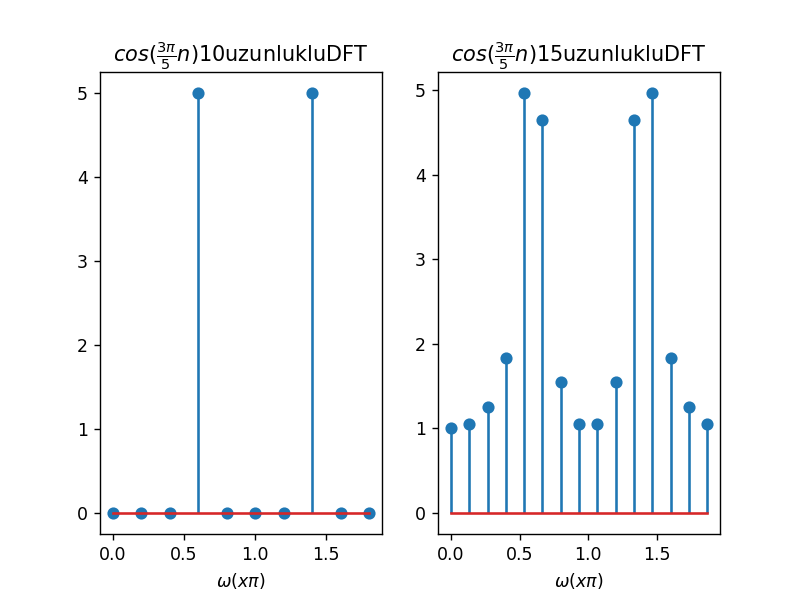

Text(0.5, 1.0, '$cos(\\frac{3\\pi}{5}n)$15uzunlukluDFT')

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft
#10uzunluklu versiyon
n1=np.arange(0,10)
x1=np.cos(3*np.pi/5*n1)
X1_abs=np.abs(fft(x1))
w_disc_1=n1*2*np.pi/len(n1)   #0-2piarası 2pi/10adımlı vektör (2pinoktası dahil değil)
plt.figure()
plt.subplot(121)
plt.stem(w_disc_1/np.pi,X1_abs)
plt.xlabel('$\omega(x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$10uzunlukluDFT')
#15uzunluklu versiyon
n2=np.arange(0,15)
x2=np.cos(3*np.pi/5*n2)
X2_abs=np.abs(fft(x2))
w_disc_2=n2*2*np.pi/len(n2)   #0-2piarası 2pi/15adımlı vektör (2pinoktası dahil değil)
plt.subplot(122)
plt.stem(w_disc_2/np.pi,X2_abs)
plt.xlabel('$\omega(x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$15uzunlukluDFT')

#### 2.2.2 DFT genlik ve faz grafiklerinden işaret sentezi

<IPython.core.display.Javascript object>


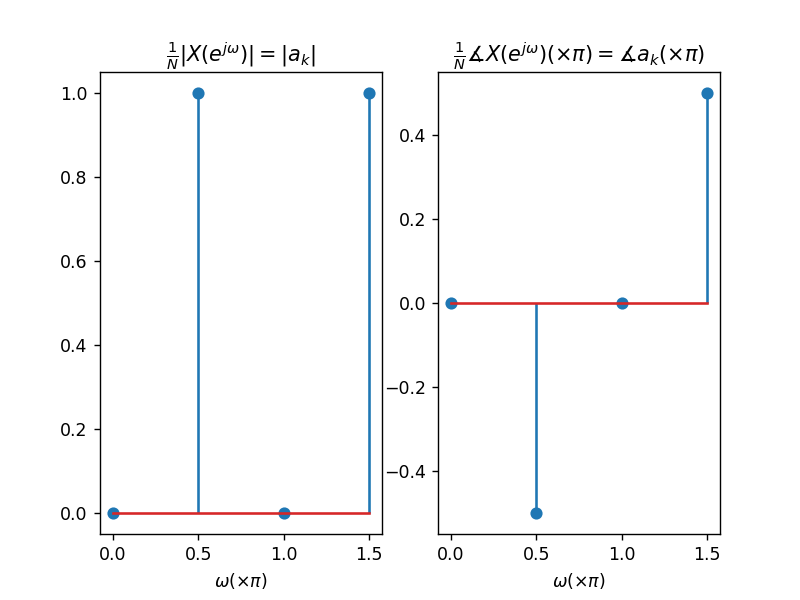

Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times\\pi)=\\measuredangle a_k(\\times \\pi)$')

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft
x=np.array([0,2,0,-2])
N=len(x)
n=np.arange(0,4)
w_disc=n*2*np.pi/N # 0-2pi arasında(2pi noktası dahil değil) 2pi/4 adımlı vektör 
X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)
plt.subplot(121)
plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')
plt.subplot(122)
plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times\pi)=\measuredangle a_k(\\times \pi)$')


## 3-) BASAMAK, DÜRTÜ İŞARETLERİNİN KOLAYCA OLUŞTURULMASI

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft
n=np.arange(-20,21)
# yol-1
u_n=np.array([0 if i<0 else 1 for i in n])
#yol-2
u_n=[]
for i in n:
    if i<0:
        u_n.append(0)
    else:
        u_n.append(1)
#yol-3(bu yol önerilmemektedir)
u_n = np.concatenate((np.zeros(20),np.ones(21)))
#yol-4
u_n=np.ones(len(n))
u_n[n<0]=0

n=np.arange(-20,21)
u_n_3=np.array([0 if i<3 else 1 for i in n])
dirac_n=np.array([0 if i!=0 else 1 for i in n])
dirac_n_arti_2=np.array([0 if i!=-2 else 1 for i in n])
u_n_eksi_u_n_10=np.array([1 if i>=0 and i<10 else 0 for i in n])

# 4-)  ODEV-3

## a-)

# $X(e^{jw}) = \sum_{n=-\infty}^\infty x[n] e^{-jwn}$ 

##  $ h[n] = \delta [n] - \delta [n - 1] $ için uyarlandığında

# $H(e^{jw}) = \sum_{n=-\infty}^\infty h[n] e^{-jwn} \Rightarrow H(e^{jw}) = \sum_{n=-\infty}^\infty \delta[n] e^{-jwn} 
\sum_{n=-\infty}^\infty \delta[n - 1] e^{-jwn}$ 

# $H_1(e^{jw}) = \sum_{n=-\infty}^\infty \delta[n] e^{-jwn} =e^{-jw0} = 1 $

# $H_2(e^{jw}) = \sum_{n=-\infty}^\infty \delta[n - 1] e^{-jwn} =e^{-jw1} = e^{-jw} $

# $ H(e^{jw}) = H_1(e^{jw}) - H_2(e^{jw}) = \mathtt{1 - e^{-jw}}$
# $ H(e^{jw}) = \mathtt{1 - e^{-jw}}$ 
# $ 1 = (e^{-jw/2}) * (e^{+jw/2})$
# $ e^{-jw} = (e^{-jw/2}) * (e^{-jw/2}) $

# $ 1 - e^{-jw} = (e^{-jw/2}) * (e^{+jw/2}) - (e^{-jw/2}) * (e^{-jw/2}) $
# $ = (e^{-jw/2})[ (e^{+jw/2}) - (e^{-jw/2}) ] = 2j(e^{-jw/2})\frac{[ (e^{+jw/2}) - (e^{-jw/2}) ]}{2j} $ 

# $ = 2j(e^{-jw/2})sin (\frac {\omega}{2}) = 2e^{j(\frac{-w +\pi }{2})}sin( \frac {\omega} {2}) $

# $ H(e^{jw}) = \mathtt{2e^{j(\frac{-w +\pi }{2})}sin( \frac {\omega} {2})} $ 
### $|H(e^{j\omega})|=|2.sin(\omega/2)|$
### $\measuredangle H(e^{j\omega})=-\omega/2$ or $(-\omega/2)+\pi$

Text(0.5, 0, 'w(x$\\pi$)')

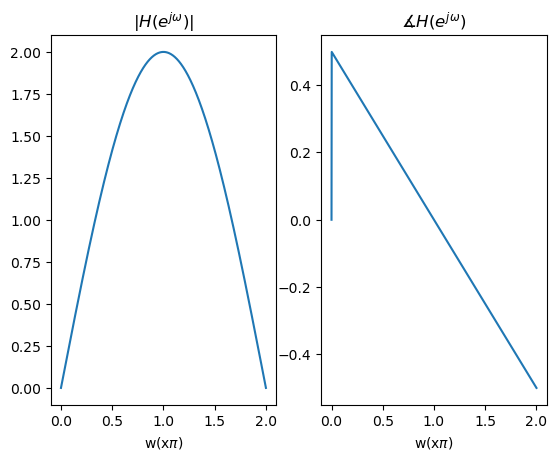

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft


steps=np.linspace(0,2*np.pi,1000)#0'dan 2pi'ye 1000 adım

# 0'dan oluşan diziler
faz=np.zeros(1000)
genlik=np.zeros(1000)

# Sayaç
i = 0

# Sinyal-->2*np.exp(-1j*w/2+1j*np.pi/2)*np.sin(w/2)

for w in steps:
    genlik[i] = np.abs(2*np.exp(-1j*w/2+1j*np.pi/2)*np.sin(w/2))
    faz[i] = np.angle(2*np.exp(-1j*w/2+1j*np.pi/2)*np.sin(w/2))
    i+=1

plt.subplot(121)
plt.plot(steps/np.pi,genlik)
plt.title('$|H(e^{j\omega})|$')
plt.xlabel('w(x$\pi$)')
plt.subplot(122)
plt.plot(steps/np.pi,faz/np.pi)
plt.title('$ \measuredangle H(e^{j\omega})$')
plt.xlabel('w(x$\pi$)')


## b-)

### Elde edilen sinyal çizdirilip grafiğine bakıldığında 0'dan farklı frekanslarda dürtülerin olmasından dolayı elde edilen işareti alıcıda aynı şekilde elde edebilmek için bant geçiren filtre kullanılması gerekmektedir.

## c-)

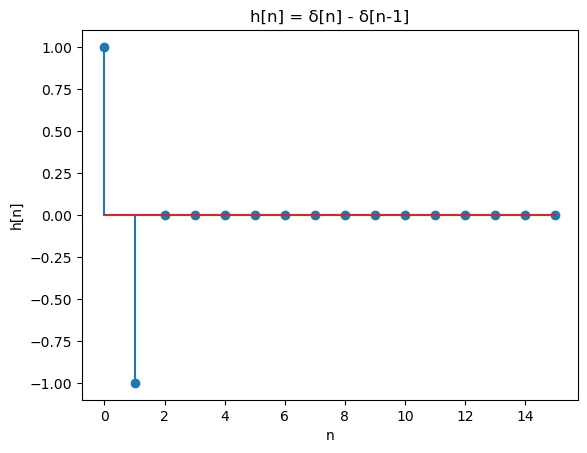

Text(0.5, 1.0, '$\\measuredangle H([k])$')

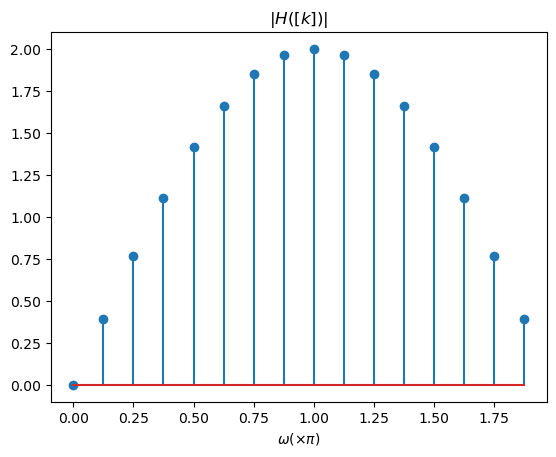

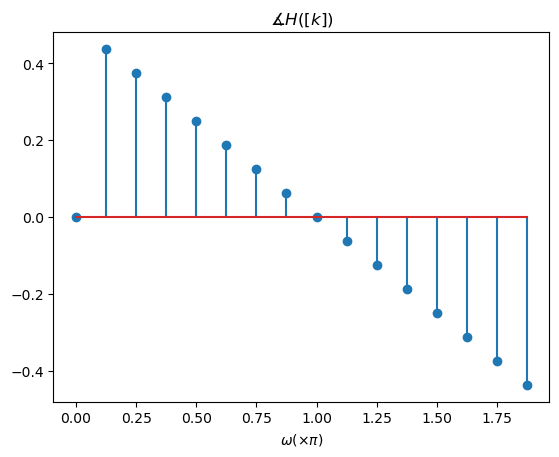

In [35]:
import numpy as np
import matplotlib.pyplot as plt

n=np.linspace(0,15,16)# 0-15 arasında 16 tam sayı
h = np.zeros(16)
h[0] = 1
h[1] = -1

plt.stem(n, h)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('h[n] = δ[n] - δ[n-1]')
plt.show()
adım=len(h)
vec=n*2*np.pi/adım # 0-2pi arasında N adımlı dizi

genlik=np.abs(fft(h))
faz=np.angle(fft(h))

plt.stem(vec/np.pi,genlik)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\|H([k])|$')
plt.figure()
plt.stem(vec/np.pi,faz/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\measuredangle H([k])$')